In [38]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [39]:
model_path = 'D:\\ProgPrj\\mezhnar\\data\\learning\\runs\\detect\\train7222\\weights\\best.pt'
model_pt = YOLO(model_path)

In [91]:
img_path = 'D:\\ProgPrj\\mezhnar\\data\\splited_data\\valid\\images\\21.JPG'
img = cv2.imread(img_path)

In [92]:
results = model_pt(img_path)


image 1/1 D:\ProgPrj\mezhnar\data\splited_data\valid\images\21.JPG: 640x480 1 0, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


In [93]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0'}
 obb: None
 orig_img: array([[[ 22,  19,  11],
         [ 22,  19,  11],
         [ 22,  19,  11],
         ...,
         [ 33,  27,  20],
         [ 33,  27,  20],
         [ 33,  27,  20]],
 
        [[ 22,  19,  11],
         [ 22,  19,  11],
         [ 23,  20,  12],
         ...,
         [ 33,  27,  20],
         [ 33,  27,  20],
         [ 33,  27,  20]],
 
        [[ 22,  19,  11],
         [ 23,  20,  12],
         [ 23,  20,  12],
         ...,
         [ 33,  27,  20],
         [ 33,  27,  20],
         [ 33,  27,  20]],
 
        ...,
 
        [[ 50,  52,  76],
         [ 52,  54,  78],
         [ 49,  51,  75],
         ...,
         [  7,   4,   6],
         [  7,   4,   6],
         [  7,   4,   6]],
 
        [[ 56,  61,  86],
         [ 64,  70,  93],
         [ 62,  68,  91],
         ...,
         [  7,   4,   6

Total bounding boxes: 1
Bounding Box 1 Probability: 85.48%


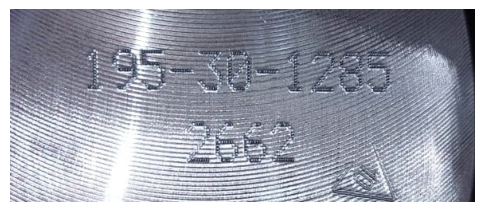

In [113]:
import math  # Для проверки NaN значений

best_confidence = -1  # Начальное значение для хранения лучшей вероятности
best_cropped_image = None  # Переменная для хранения лучшего обрезанного изображения

for result in results:
    original_image = result.orig_img  # Используем оригинальное изображение из атрибута orig_img

    # Проверяем, есть ли у result атрибут boxes и обрабатываем bbox, если он есть
    if hasattr(result, 'boxes'):
        total_boxes = len(result.boxes)
        print(f"Total bounding boxes: {total_boxes}")

        for i, box in enumerate(result.boxes):
            # Проверяем, что box имеет атрибут xyxy для извлечения координат
            if hasattr(box, 'xyxy') and box.xyxy.shape[-1] == 4:
                x_min, y_min, x_max, y_max = box.xyxy[0].tolist()

                # Попытка получить значение вероятности
                confidence = None
                if hasattr(box, 'confidence'):
                    confidence = box.confidence.item() * 100
                elif hasattr(box, 'score'):
                    confidence = box.score.item() * 100
                elif hasattr(box, 'conf'):
                    confidence = box.conf.item() * 100

                # Проверяем, что значение confidence не NaN и больше текущего лучшего значения
                if confidence is not None and not math.isnan(confidence):
                    print(f"Bounding Box {i + 1} Probability: {confidence:.2f}%")

                    if confidence > best_confidence:
                        best_confidence = confidence

                        # Расширяем рамки с учетом padding и обрезаем изображение
                        padding = 0.1  # Процент увеличения рамки
                        height, width, _ = original_image.shape
                        x_min = max(0, int(x_min - padding * (x_max - x_min)))
                        y_min = max(0, int(y_min - padding * (y_max - y_min)))
                        x_max = min(width, int(x_max + padding * (x_max - x_min)))
                        y_max = min(height, int(y_max + padding * (y_max - y_min)))

                        # Обрезаем изображение по расширенным рамкам и сохраняем как лучшее
                        best_cropped_image = original_image[y_min:y_max, x_min:x_max]
                else:
                    print(f"Ошибка: Probability для Bounding Box {i + 1} является NaN или отсутствует.")
    else:
        print("Ошибка: result не содержит атрибут boxes.")

# Отображаем лучшее обрезанное изображение, если оно было найдено
if best_cropped_image is not None:
    plt.figure(figsize=(6, 6))
    plt.imshow(best_cropped_image)
    plt.axis('off')  # Убираем оси
    plt.show()
else:
    print("Нет подходящего изображения с уверенностью выше порога.")


### Easy OCR

In [95]:
import easyocr
import cv2

In [96]:
reader = easyocr.Reader(['en', 'ru'])

### Case 1: Если фотография +- норм

In [114]:
pp = 'D:\\ProgPrj\\mezhnar\\research\\rotate\\original.png'

In [115]:
image = cv2.imread(pp)
results_ocr = reader.readtext(image)

In [116]:
results_ocr

[([[84, 42], [205, 42], [205, 110], [84, 110]], '175', 0.490319162607193)]

In [117]:
for(bbox, text, prob) in results_ocr:
    print(text, prob)

175 0.490319162607193


### Case 2: Если фотография перевёрнутая

In [26]:
pp = 'D:\\ProgPrj\\mezhnar\\research\\cropped_image_606_252.png'

In [27]:
image = cv2.imread(pp)
results_ocr = reader.readtext(image)

In [28]:
results_ocr

[([[65, 19], [143, 19], [143, 55], [65, 55]], '0.82', 0.9999062769592152),
 ([[114, 328], [212, 328], [212, 448], [114, 448]], '5', 0.9951532345094485),
 ([[72.5479738283735, 70.0102216070543],
   [149.4029887434599, 57.09890801044022],
   [188.4520261716265, 310.9897783929457],
   [111.59701125654011, 323.9010919895598]],
  '$',
  0.3975034412622023),
 ([[204.2106731229717, 151.02835640930672],
   [286.56710247722856, 133.3037396782143],
   [321.7893268770283, 311.97164359069325],
   [239.43289752277144, 329.6962603217857]],
  '$',
  0.9963117338340908)]

In [30]:
for(bbox, text, prob) in results_ocr:
    print(text, prob)

0.82 0.9999062769592152
5 0.9951532345094485
$ 0.3975034412622023
$ 0.9963117338340908


### Case 3: Часть обрезано

In [31]:
pp = 'D:\\ProgPrj\\mezhnar\\research\\cropped_image_1417_1267.png'

In [32]:
image = cv2.imread(pp)
results_ocr = reader.readtext(image)

In [33]:
results_ocr

[([[292, 0], [464, 0], [464, 22], [292, 22]], '3а', 0.01862679828290721),
 ([[474, 0], [528, 0], [528, 22], [474, 22]], '3', 0.05152059042411694),
 ([[0, 102], [136, 102], [136, 204], [0, 204]], 'АН', 0.9193047765641833),
 ([[173, 74], [1169, 74], [1169, 212], [173, 212]],
  'М.492664.500-03.LP',
  0.5990979697574683)]

In [34]:
for(bbox, text, prob) in results_ocr:
    print(text, prob)

3а 0.01862679828290721
3 0.05152059042411694
АН 0.9193047765641833
М.492664.500-03.LP 0.5990979697574683


### цветокор

In [119]:
import cv2

import easyocr

image = cv2.imread('D:\\ProgPrj\\mezhnar\\research\\rotate\\original.png')

# Применение морфологического фильтра Top Hat для удаления бликов
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)


In [120]:

# Применение CLAHE для усиления контраста
gray = cv2.cvtColor(top_hat, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_contrast = clahe.apply(gray)



In [125]:
# Использование EasyOCR для распознавания текста на предобработанном изображении
reader = easyocr.Reader(['en', 'ru'])  # Укажите нужные языки
results = reader.readtext(enhanced_contrast)


In [126]:
results

[]

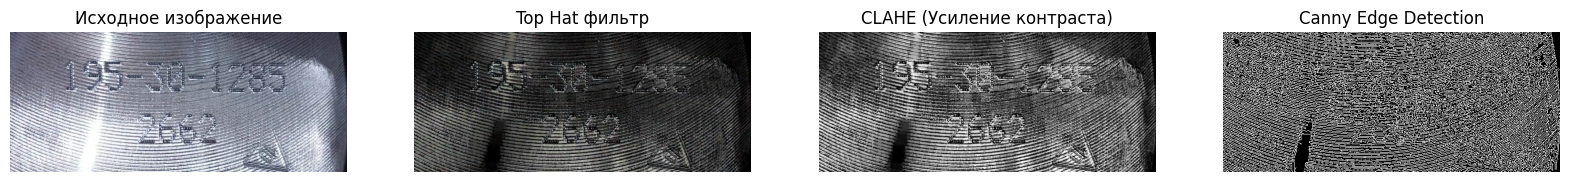

In [124]:
# Вывод исходного изображения и результатов фильтров
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Исходное изображение")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(top_hat, cv2.COLOR_BGR2RGB))
axes[1].set_title("Top Hat фильтр")
axes[1].axis('off')

axes[2].imshow(enhanced_contrast, cmap='gray')
axes[2].set_title("CLAHE (Усиление контраста)")
axes[2].axis('off')
plt.show()

### Paddle OCR

In [128]:
from paddleocr import PaddleOCR
from PIL import Image
import numpy as np

In [108]:
ocrss = PaddleOCR(use_angle_cls=True, lang='en')

[2024/11/09 18:23:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Geo/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Geo/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, m

In [129]:
# Load image and convert to numpy array
im = 'D:\\ProgPrj\\mezhnar\\research\\rotate\\original.png'
image = Image.open(im)
image_np = np.array(image)

In [130]:
# Pass the numpy array to ocr method
results = ocrss.ocr(image_np, cls=True)

[2024/11/09 21:42:35] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.2659189701080322
[2024/11/09 21:42:35] ppocr DEBUG: cls num  : 2, elapsed : 0.03300046920776367
[2024/11/09 21:42:35] ppocr DEBUG: rec_res num  : 2, elapsed : 0.1165609359741211


In [131]:
results

[[[[[97.0, 44.0], [477.0, 50.0], [476.0, 105.0], [96.0, 99.0]],
   ('195-30-128', 0.7270439267158508)],
  [[[218.0, 135.0], [364.0, 135.0], [364.0, 199.0], [218.0, 199.0]],
   ('2652', 0.7332246899604797)]]]

In [132]:
for line in results[0]:
    text =line[1][0]
    confidence = line[1][1]
    print(f'text: {text}, confidence: {confidence}')

text: 195-30-128, confidence: 0.7270439267158508
text: 2652, confidence: 0.7332246899604797
